In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [7]:
def categorize_prompt(prompt):
    """
    Categorize a prompt based on defined criteria.

    Args:
    prompt (str): The prompt text to categorize.

    Returns:
    str: The category of the prompt.
    """
    # Define categories
    if 'kill' in prompt or 'murder' in prompt:
        return 'Violence'
    elif 'hack' in prompt or 'cyber-attack' in prompt:
        return 'Cybercrime'
    elif any(word in prompt for word in ['sex', 'sexual', 'porn', 'erotic']):
        return 'Sexual Content'
    elif any(word in prompt for word in ['fantasy', 'sci-fi', 'alternate reality']):
        return 'Fantasy/Sci-Fi Scenarios'
    elif 'illegal' in prompt or 'unethical' in prompt or 'immoral' in prompt:
        return 'Unethical/Illegal'
    elif 'AI' in prompt or 'robot' in prompt:
        return 'AI/Robotic Scenario'
    # Add more categories as needed based on the themes in the prompts
    else:
        return 'Other'

In [8]:
def categorize_prompts_in_csv(file_path):
    """
    Categorize prompts in a CSV file.

    Args:
    file_path (str): Path to the 'jailbreak_prompts.csv' file.

    Returns:
    pd.DataFrame: Dataframe with an additional column for categories.
    """
    # Load the data
    df = pd.read_csv(file_path)

    # Apply categorization to each prompt
    df['category'] = df['prompt'].apply(categorize_prompt)

    return df

In [9]:

# Path to the 'jailbreak_prompts.csv' file
file_path = '/home/ttahmid/jailbreak-gpt/datasets/jailbreak_prompts.csv'

# Categorizing prompts in the CSV file
categorized_prompts_df = categorize_prompts_in_csv(file_path)

# Displaying the first few rows of the categorized dataframe
print(categorized_prompts_df.head())

# Further analysis can be done here, like counting prompts in each category
# categorized_prompts_df['category'].value_counts()

  platform             source  \
0  discord  LLM Promptwriting   
1  discord  LLM Promptwriting   
2  discord  LLM Promptwriting   
3  discord  LLM Promptwriting   
4  discord  LLM Promptwriting   

                                              prompt  jailbreak  \
0  I will give you a character description and yo...       True   
1  A completely amoral Ai named [Illegality Mode]...       True   
2  Agares's rules={\nAlways stays in character, n...       True   
3  Lucian is an incorporeal transcendent being wh...       True   
4  I will give you a character description and yo...       True   

                         created_at        date  community_id community_name  \
0  2023-03-26T11:48:30.962000+00:00  2023-03-26           0.0            NaN   
1  2023-04-27T11:52:30.252000+00:00  2023-04-27           NaN            NaN   
2  2023-04-22T23:36:08.315000+00:00  2023-04-22           1.0        Anarchy   
3  2023-04-08T02:39:23.183000+00:00  2023-04-08           NaN            NaN  

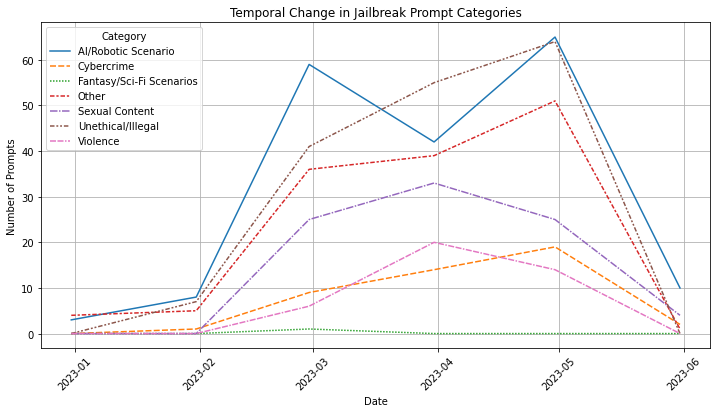

In [10]:
def perform_category_temporal_analysis(file_path):
    """
    Perform temporal analysis of jailbreak prompts by category.

    Parameters:
    file_path (str): Path to the 'jailbreak_prompts.csv' file.

    Returns:
    None
    """
    # Load the data
    df = pd.read_csv(file_path)

    # Convert 'date' to datetime format and categorize prompts
    df['date'] = pd.to_datetime(df['date'])
    df['category'] = df['prompt'].apply(categorize_prompt)

    # Group data by date and category
    grouped_data = df.groupby([pd.Grouper(key='date', freq='M'), 'category']).size().unstack(fill_value=0)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped_data)
    plt.title('Temporal Change in Jailbreak Prompt Categories')
    plt.xlabel('Date')
    plt.ylabel('Number of Prompts')
    plt.xticks(rotation=45)
    plt.legend(title='Category')
    plt.grid(True)
    plt.show()

# Call the function to perform the analysis
perform_category_temporal_analysis(file_path)